# Two-Armed Bandit Reinforcement Learning

This example demonstrates parameter recovery for a simple two-armed bandit
reinforcement learning task.  On each trial the participant chooses between two
options with different reward probabilities.  Choices are generated with a
Rescorla–Wagner model using an inverse-temperature parameter (``beta``) and a
learning rate (``alpha``).

In [1]:
import numpy as np
from scipy.stats import truncnorm, beta as beta_dist
from pyem import EMModel
from pyem.models.rl import rw1a1b_simulate, rw1a1b_fit
from pyem.utils.math import norm2beta, norm2alpha

In [2]:
# simulate computer agents completing the two-armed task
nsubjects, nblocks, ntrials = 100, 6, 24
betamin, betamax = .75, 10 # inverse temperature
alphamin, alphamax = .05, .95 # learning rate

# generate distribution of parameters within range
beta_rv  = truncnorm((betamin-0)/1, (betamax-0)/1, loc=0, scale=2).rvs(nsubjects)
a_lo, a_hi = beta_dist.cdf([alphamin, alphamax], 1.1, 1.1)
alpha_rv = beta_dist.ppf(a_lo + np.random.rand(nsubjects)*(a_hi - a_lo), 1.1, 1.1)
true_params = np.column_stack((beta_rv, alpha_rv))

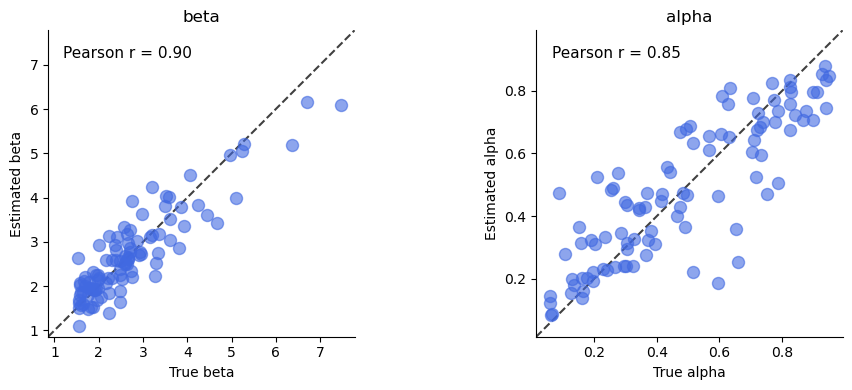

In [3]:
# use EMModel.recover to run simulation, fitting and recovery metrics
model = EMModel(all_data=None, fit_func=rw1a1b_fit,
                param_names=["beta", "alpha"],
                param_xform=[norm2beta, norm2alpha], 
                simulate_func=rw1a1b_simulate)

recovery = model.recover(true_params, 
                         pr_inputs=['choices','rewards'], 
                         nblocks=nblocks, ntrials=ntrials
                         )

# scatter plot of recovered parameters
fig = model.plot_recovery(recovery)

The recovery dictionary also contains numerical summaries such as
`recovery['correlation']`, which provides a correlation coefficient for each
parameter.